<a href="https://colab.research.google.com/github/giovanni-br/numerical-calculus-computational-Physics/blob/master/C%C3%B3pia_de_algoritmo_de_Bogoliubov_deGennes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Consistent gap equation

$$\Delta = \lambda  \int_{-Ec}^{Ec} \Delta \frac{tanh(\frac {\sqrt{\xi^2 + |\Delta|^2}}{2K_{b}T})}{2\sqrt{\xi^2 + |\Delta|^2}}d\xi $$

In [ ]:
import numpy as np

lam = 0.17
Ec = 1000
Kb= 1.38064852e-23
from scipy.integrate import quad


#compute simpson integrate of a function
def simpson(f, a, b, N):
  if N%2 == 1:
    raise ValueError("N precisa ser par!")
  pares = 0
  impares = 0
  h = (b-a)/N
  for i in range(1, int(N/2)+1):
    impares += f(a + (2*i-1)*h)
  for i in range(1, int(N/2)):
    pares += f(a + 2*i*h) 
  return (h/3)*(f(a) + f(b) + 4*impares + 2*pares)

def f(E):
  return (lam*delta_in*np.tanh(np.sqrt(E**2 + abs(delta_in)**2)/(2*Kb*T)))/(2*np.sqrt((E**2 + abs(delta_in)**2)))

In [ ]:
Kb= 1

delta_in = 10
T_vetor = np.linspace(0,30, 1000)
delta_fin_list =[]
for i in T_vetor:
  T=i
  delta_in = 1
  delta_fin = quad(f, -Ec, Ec)
  delta_in_list = [delta_in]
  while (abs(delta_in- delta_fin[0])>1e-6):
    delta_in = delta_fin[0]
    delta_fin = quad(f, -Ec, Ec)
    delta_in_list.append(delta_in)
  delta_fin_list.append(delta_fin[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


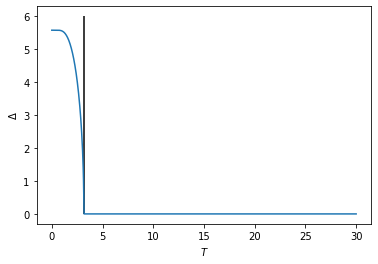

In [ ]:
import matplotlib.pyplot as plt
delta_fin_list = np.array(delta_fin_list)
plt.plot(T_vetor, delta_fin_list)
plt.ylabel('$\Delta$')
plt.xlabel('$T$')
plt.vlines(3.16, 0 ,6)
plt.show()